In [ ]:
%tensorflow_version 1.x

from tensorflow.python.client import device_lib;
import tensorflow as tf;

# Make sure tensorflow 1.x prints below, you may need to restart the runtime. Runtime => Restart Runtime
print(tf.__version__)

print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"


print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

TensorFlow 1.x selected.
1.15.2
Show System RAM Memory:


MemTotal:       13333596 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2698483631961043463
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2895896094807224341
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7483420428674249212
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14912199066
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14669098767913519375
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [ ]:
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt
import os
import zipfile
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
local_zip = '/content/drive/My Drive/ML/petfinder-adoption-prediction.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/train_images'
img_names = os.listdir(os.path.join(base_dir))
img_names[:10]

['7ad53619d-1.jpg',
 '207d61997-3.jpg',
 '8f0468771-1.jpg',
 '9827921f8-2.jpg',
 'dcd75bfdb-3.jpg',
 '48432dfa0-2.jpg',
 '7ad21fd0b-1.jpg',
 '0eb101936-2.jpg',
 '767a3b706-3.jpg',
 '3be9dc4cd-2.jpg']

In [ ]:
#base_dir=!ls '/content/drive/My Drive/ML/train_pets/'

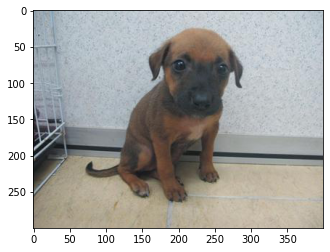

In [ ]:
sample = random.choice(img_names)
#sample=sample.split(" ")
#sample=sample[0]
image = load_img('/tmp/train_images/'+sample)
plt.imshow(image)
plt.show()


In [ ]:
df=pd.read_csv('/content/drive/My Drive/ML/train_images2.csv')
df.head()

,file_name,category
0,0008c5398-1.jpg,3
1,0008c5398-2.jpg,3
2,0008c5398-3.jpg,3
3,0008c5398-4.jpg,3
4,0008c5398-5.jpg,3


In [ ]:
df.shape

(58311, 2)

In [ ]:
df["category"] = df["category"].replace({0: 'mas de 2 meses', 1: 'Hasta 2 meses',2: 'hasta 1 mes',3: 'hasta 2 semanas',4: 'Dias'}) 

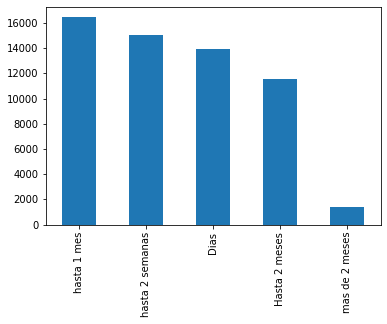

In [ ]:
df['category'].value_counts().plot.bar()

In [ ]:
train_df, validate_df = train_test_split(df, test_size = 0.2)
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)

In [ ]:
train_df

,file_name,category
0,e4f7394ef-7.jpg,Dias
1,9bb035799-2.jpg,Dias
2,a5205f8ab-2.jpg,Dias
3,34fe22f69-1.jpg,hasta 1 mes
4,8910f2f5e-5.jpg,hasta 1 mes
...,...,...
46643,c444c2936-1.jpg,hasta 1 mes
46644,b822d0566-1.jpg,hasta 2 semanas
46645,326b17344-5.jpg,hasta 2 semanas
46646,eb22ed27d-4.jpg,hasta 2 semanas


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 35, 35, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 35, 35, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 17, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 17, 17, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         8

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'SGD',
              metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    '/tmp/train_images/', 
    x_col='file_name',
    y_col='category',
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=128
)

Found 46648 validated image filenames belonging to 5 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    '/tmp/train_images/', 
    x_col='file_name',
    y_col='category',
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=1024
)

Found 11663 validated image filenames belonging to 5 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch = np.ceil(46648/1024),  # 20000 images = batch_size * steps
      epochs = 10,
      validation_data=validation_generator,
      validation_steps = np.ceil(11663/1024),  # 5000 images = batch_size * steps
      verbose = 1)

Epoch 1/10
46/46 [==============================] - 82s 2s/step - loss: 2.8148 - acc: 0.2422 - val_loss: 1.5523 - val_acc: 0.2587
Epoch 2/10
46/46 [==============================] - 70s 2s/step - loss: 1.6978 - acc: 0.2514 - val_loss: 1.5178 - val_acc: 0.2737
Epoch 3/10
46/46 [==============================] - 68s 1s/step - loss: 1.6242 - acc: 0.2590 - val_loss: 1.4918 - val_acc: 0.2712
Epoch 4/10
46/46 [==============================] - 70s 2s/step - loss: 1.6126 - acc: 0.2537 - val_loss: 1.4837 - val_acc: 0.2802
Epoch 5/10
46/46 [==============================] - 69s 2s/step - loss: 1.5787 - acc: 0.2519 - val_loss: 1.4817 - val_acc: 0.2551
Epoch 6/10
46/46 [==============================] - 67s 1s/step - loss: 1.5592 - acc: 0.2502 - val_loss: 1.4785 - val_acc: 0.2773
Epoch 7/10
46/46 [==============================] - 69s 2s/step - loss: 1.5536 - acc: 0.2604 - val_loss: 1.4724 - val_acc: 0.2635
Epoch 8/10
46/46 [==============================] - 69s 1s/step - loss: 1.5387 - acc: 0.24

In [ ]:
history

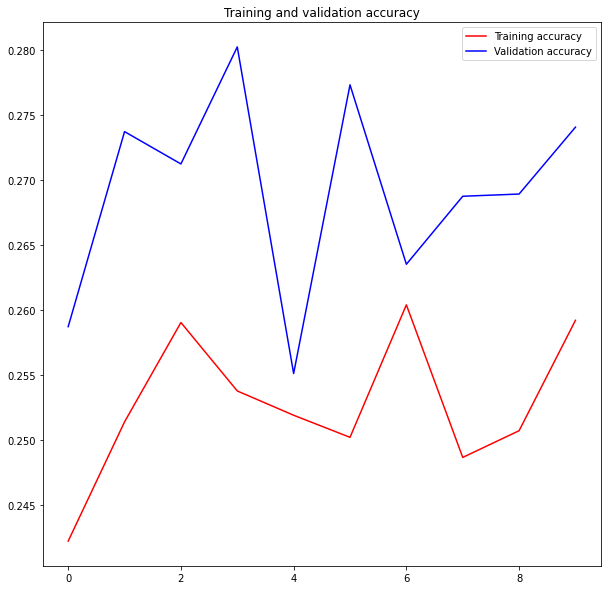

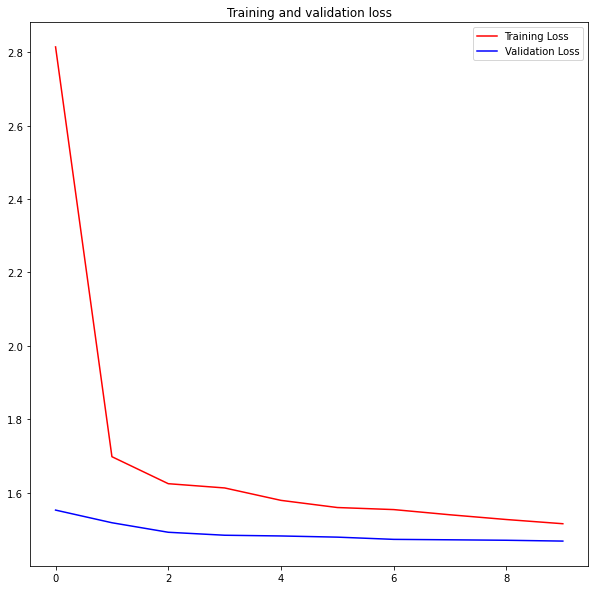

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,10))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(10,10))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
file_images=!ls '/tmp/test_images'

In [ ]:
test=[]
for img in file_images:
  arr=img.split(" ")
  arr= [x for x in arr if len(x.strip()) > 0]
  test.extend(arr)

In [ ]:
test_df = pd.DataFrame({'Image': test})
test_df

,Image
0,000aa306a-1.jpg
1,3e8c5fbbb-1.jpg
2,7d7cbe3da-2.jpg
3,bdae26123-1.jpg
4,000aa306a-2.jpg
...,...
14460,7d736761c-1.jpg
14461,bdad38533-4.jpg
14462,3e891bd12-1.jpg
14463,7d7cbe3da-1.jpg


In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    '/tmp/test_images', 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False
)

Found 14465 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator, steps = np.ceil(14465/20))

In [ ]:
np.set_printoptions(threshold=np.inf)
predict

array([[0.18613617, 0.24799676, 0.29046735, 0.23166691, 0.04373279],
       [0.23481221, 0.20455153, 0.26701337, 0.22673514, 0.06688774],
       [0.2663581 , 0.2382145 , 0.24648881, 0.20815122, 0.04078737],
       [0.20060858, 0.23567213, 0.30469346, 0.22404411, 0.03498168],
       [0.19947758, 0.22485517, 0.28395465, 0.24504729, 0.04666523],
       [0.2069433 , 0.227898  , 0.25916368, 0.26138374, 0.04461125],
       [0.24210705, 0.2049029 , 0.26449555, 0.2541663 , 0.03432827],
       [0.20291723, 0.24401163, 0.2737846 , 0.23607634, 0.04321012],
       [0.2373124 , 0.22468692, 0.22360748, 0.27292544, 0.04146782],
       [0.20429844, 0.20844063, 0.2670476 , 0.26290682, 0.05730652],
       [0.18604057, 0.22936049, 0.28989166, 0.2355923 , 0.05911496],
       [0.23651671, 0.21481584, 0.275197  , 0.2438144 , 0.02965599],
       [0.24286269, 0.19364338, 0.25103503, 0.23880456, 0.07365434],
       [0.23599714, 0.21530187, 0.25215685, 0.24172297, 0.05482117],
       [0.20605801, 0.22195882, 0.

In [ ]:
predict1=np.array([],dtype=float)

In [ ]:
for valor in predict:
  m = max(valor)
  predict1=np.append(predict1,[i for i, j in enumerate(valor) if j == m])

In [ ]:
predict1

array([2., 2., 0., 2., 2., 3., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 0., 1., 3., 1., 2., 2., 2., 2., 0., 2., 2., 3., 2., 2., 1.,
       2., 2., 1., 2., 0., 2., 2., 2., 2., 2., 1., 2., 3., 2., 0., 2., 3.,
       2., 0., 2., 2., 3., 2., 2., 0., 2., 0., 3., 1., 2., 0., 2., 3., 2.,
       3., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 3., 2., 2.,
       1., 3., 2., 2., 2., 0., 1., 2., 3., 2., 2., 3., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 3., 1., 2., 2., 1., 2., 2., 2., 2., 3., 2., 1., 3.,
       2., 2., 2., 2., 3., 2., 1., 2., 3., 3., 2., 0., 1., 2., 1., 2., 2.,
       3., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 1., 2., 3., 2., 2., 2.,
       1., 1., 2., 3., 2., 2., 2., 3., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 0., 3., 3., 0., 2., 3., 2., 3., 0., 2., 2., 2., 0., 0., 3., 1.,
       3., 2., 3., 2., 3., 2., 2., 2., 2., 3., 2., 2., 2., 2., 3., 2., 2.,
       2., 2., 2., 2., 3.

In [ ]:
def label(predict):
    if(predict ==0):
        return "0"
    elif(predict ==1):
        return "1"
    elif(predict ==2):
        return "2"
    elif(predict ==3):
        return "3"
    elif(predict ==4):
        return "4"

In [ ]:
test_df['Label'] = predict1
test_df['Label'] = test_df['Label'].apply(label)

In [ ]:
test_df.head(5)

,Image,Label
0,000aa306a-1.jpg,2
1,3e8c5fbbb-1.jpg,2
2,7d7cbe3da-2.jpg,0
3,bdae26123-1.jpg,2
4,000aa306a-2.jpg,2


In [ ]:
test_df.Label.value_counts()

2    9122
1    2371
3    2008
0     964
Name: Label, dtype: int64

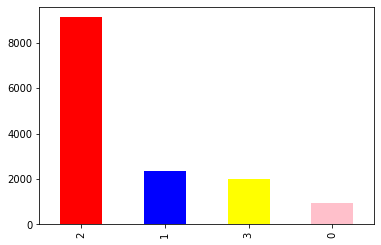

In [ ]:
test_df.Label.value_counts().plot.bar(color = ['red','blue','yellow','pink','brown'])
plt.show()

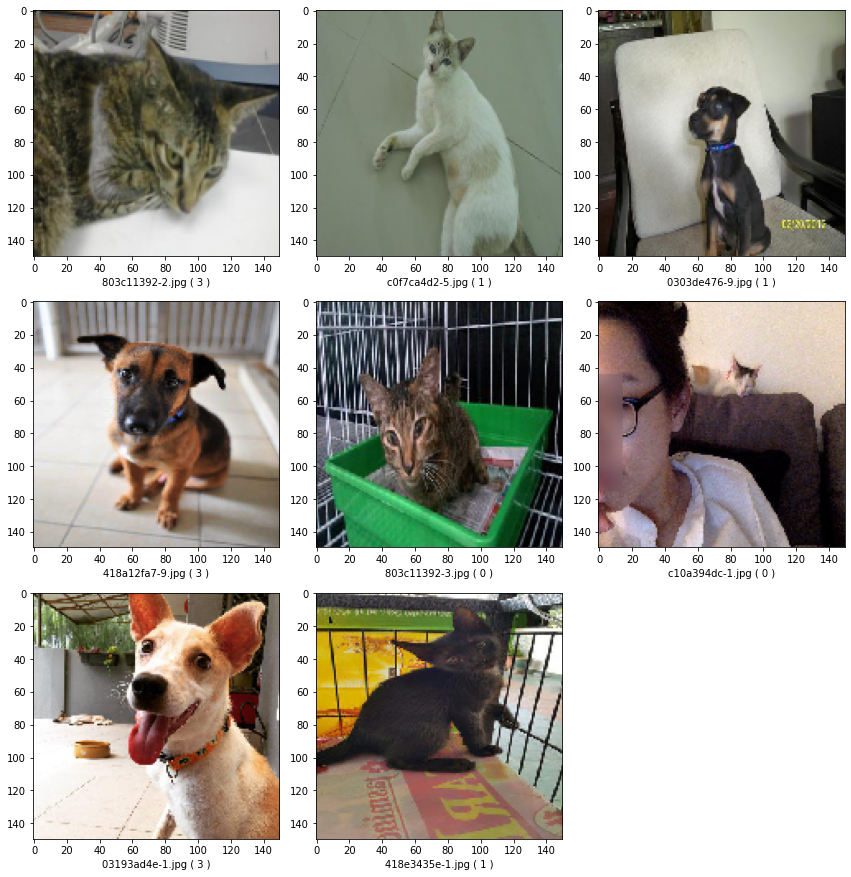

In [ ]:
v = random.randint(0, 14000)

sample_test = test_df.iloc[v:(v+8)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img('/tmp/test_images/' + filename, target_size = (150, 150))
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()